In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [3]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})

In [4]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [5]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [6]:
trend_df = trend_dfs[0]

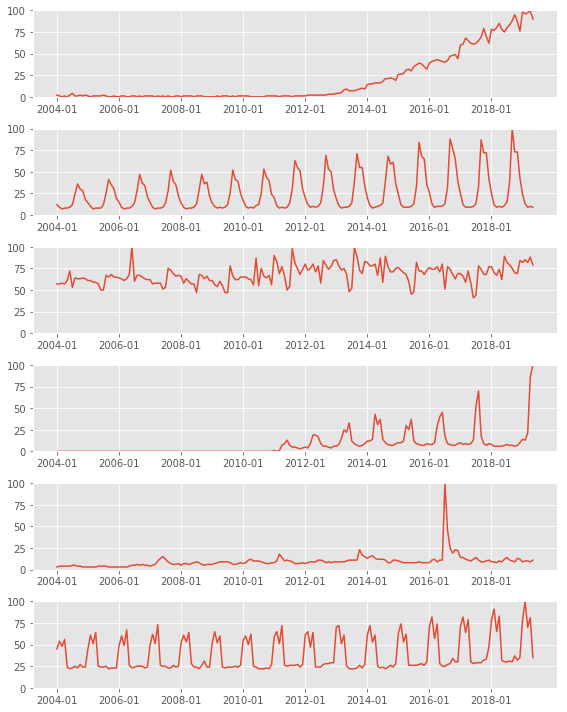

In [7]:
import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

In [8]:
taxes_df = trend_dfs[-1]

In [9]:
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12

In [10]:
trend_model = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

In [11]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(taxes_df[['month']])
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [12]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

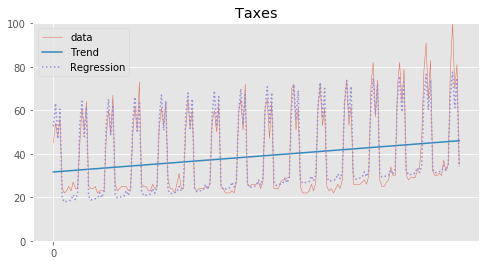

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Taxes")
ax.plot(trend_df['i'], trend_df['values'], label='data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

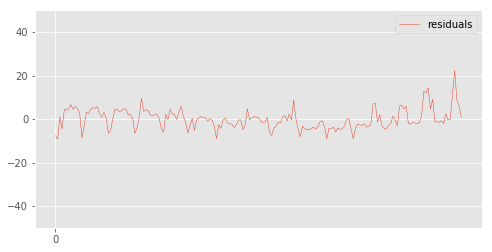

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_title("Tax Trend")
ax.plot(trend_df['i'],
        trend_df['values'] - lr_pred,
        label='residuals',
        linewidth=.5)
#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-50, 50))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()